# Introduction to Unsupervised Learning

In this notebook, we will learn what unsupervised learning is, and some example applications of it on real cleantech datasets. 

Before, we were exposed to supervised learning techniques. This was when we knew the true value/classification of a datapoint. Some examples of supervised learning that we have looked at include logistic regression, linear regression, K-nearest neighbours, decision trees, and random forests.

However, when it comes to unsupervised learning, things are a bit different. 
Unsupervised learning is a machine learning technique where a model learns patterns and structures in data without the need for explicit labels or a predefined target variable. In unsupervised learning, the model explores the inherent structure of the data to identify meaningful patterns, relationships, and groupings. In other words, clustering is huge part of unsupervised learning. 

Unlike supervised learning, where the model is trained on labeled examples to make predictions or classify data, unsupervised learning aims to discover hidden patterns and gain insights from the data itself. It is particularly useful when dealing with unlabeled or unstructured data, as it can help in data exploration, anomaly detection, clustering, and dimensionality reduction.

Here are a few examples of unsupervised learning algorithms:
- K-means clustering 
- DBSCAN
- Heirarchical clustering
- Principal Component Analysis (PCA)


Unsupervised learning techniques play a crucial role in exploratory data analysis, pattern discovery, and understanding complex data structures without prior knowledge. Valuable insights can be gained from unannotated datasets, leading to a better understanding of the underlying data distribution and improved decision-making as a result.

<!-- 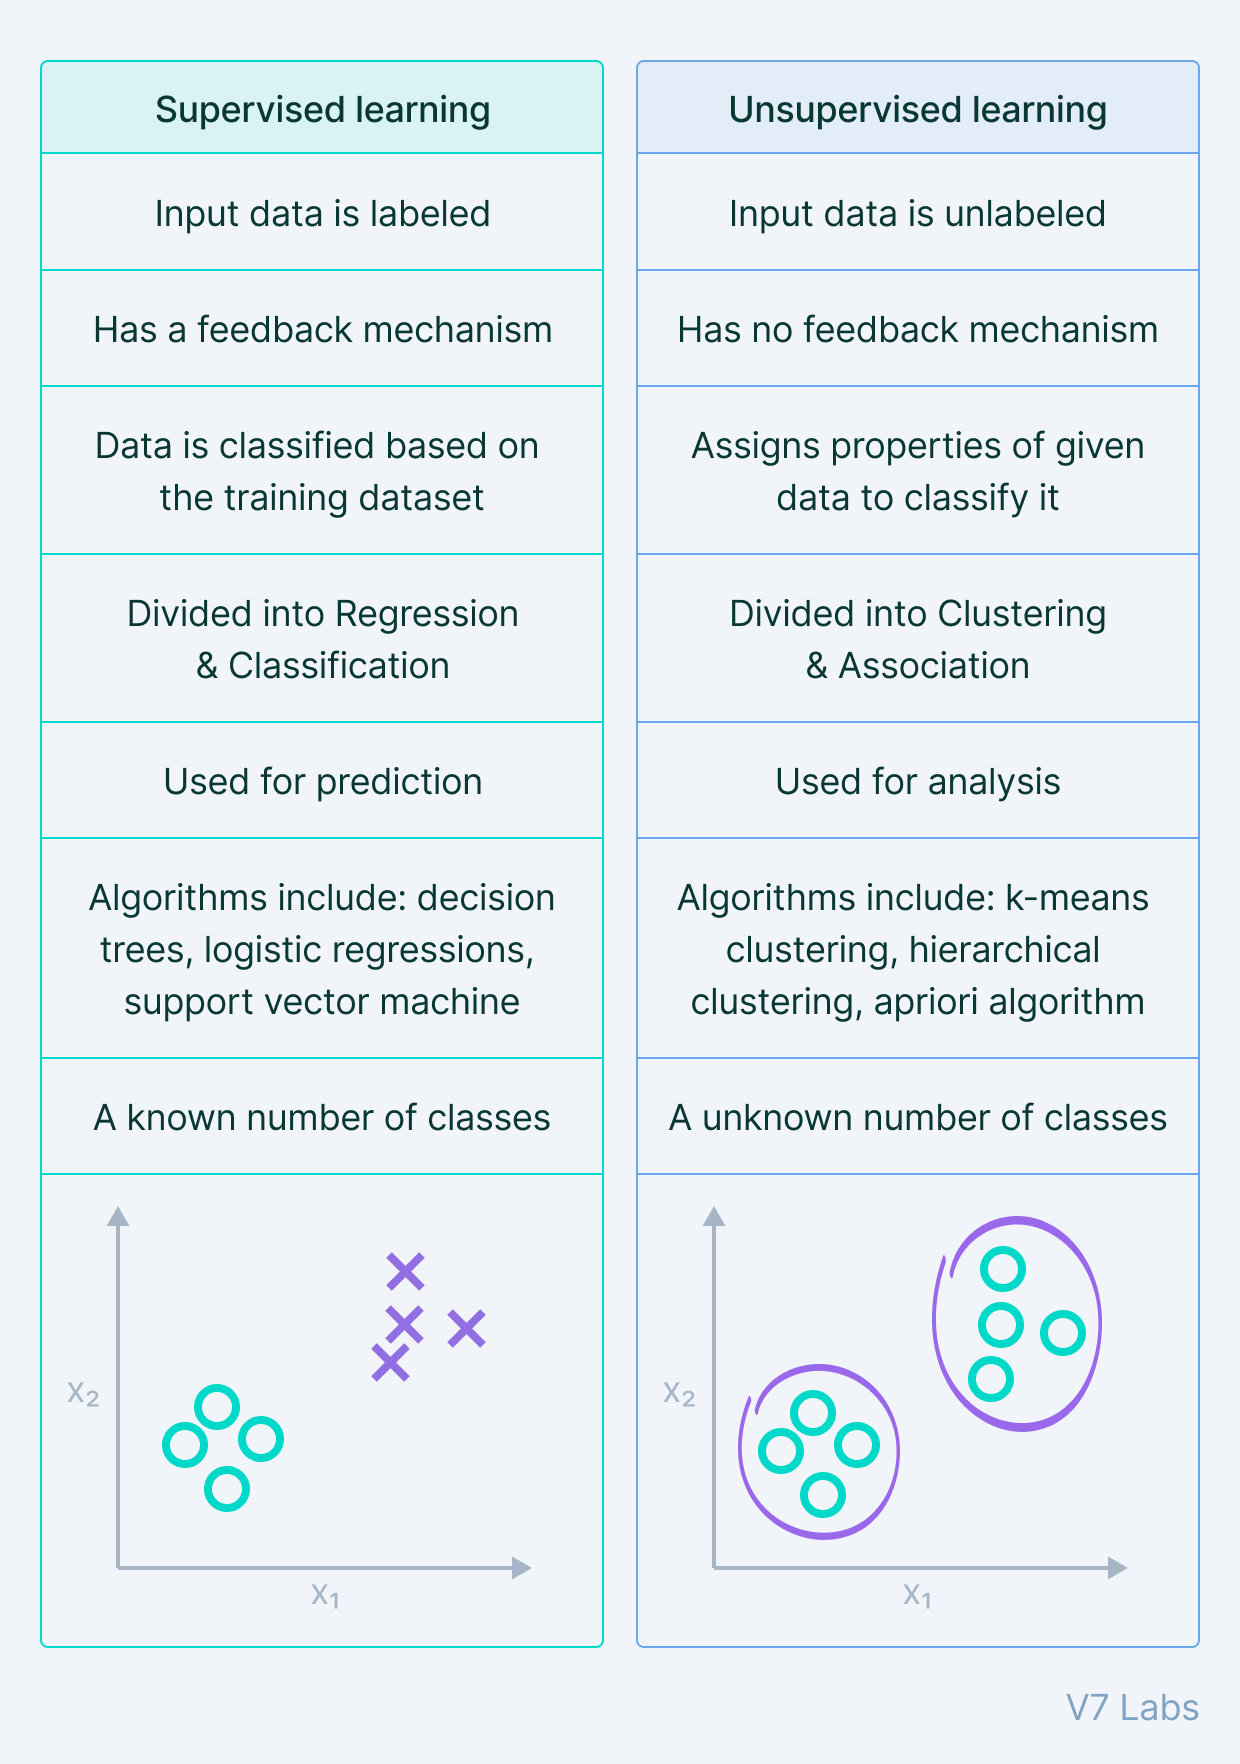 -->
<!-- 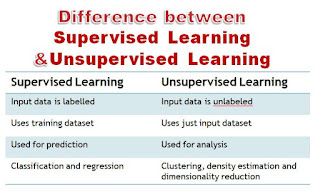 -->

| Supervised Learning | Unsupervised Learning |
| --- | --- | 
| Input data is labelled | Input data is unlabelled |
| Used for prediction | Used for analysis |
| Classification and regression | Clustering, density estimation and dimensionality reduction |

In case of supervised learning, we're given X and y.
In case of unsupervised learning, we're only given X and the goal is to identify the underlying structure in data.


### Supervised Learning:

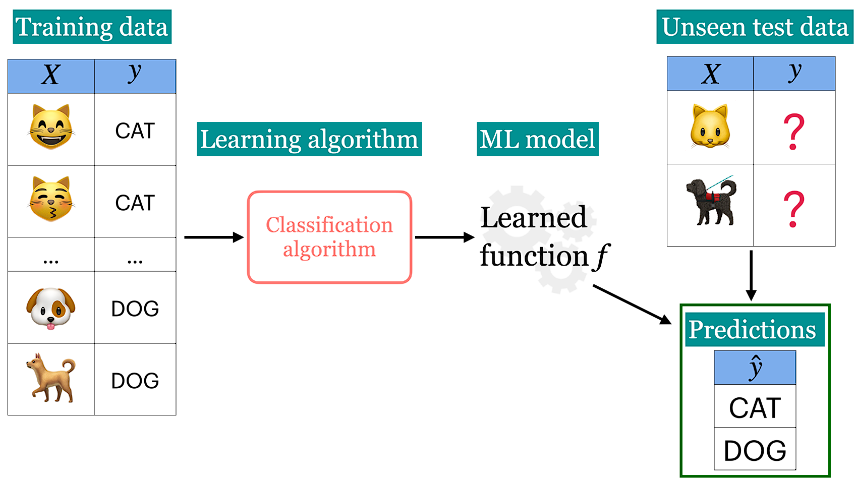

### Unsupervised Learning:

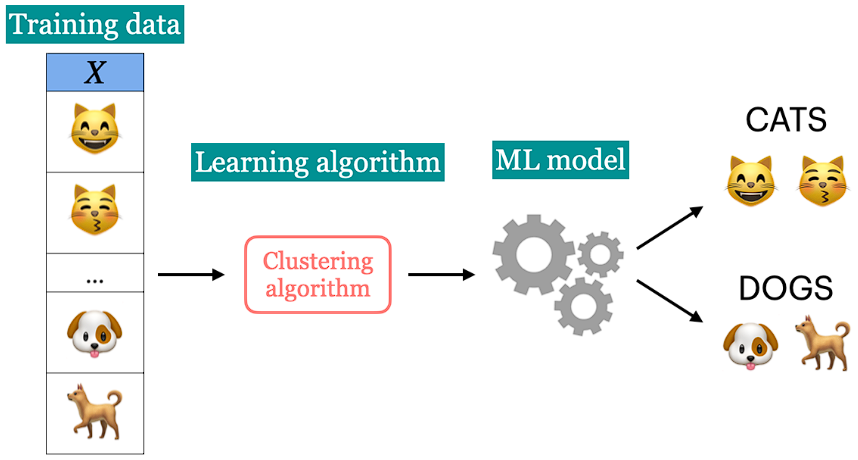

### Clustering Motivation

What's the importance of clustering, anyway?
- Most of the data out in the wild is actually unlabeled, thus giving us no choice but to execute unsupervised learning techniques.
- Getting labeled training data is often difficult, expensive, or simply impossible in some cases.
- The most intuitive way is to group similar examples together to get some insight into the data even though we do not have the targets.

### K-Means

In this notebook, we will be exploring the k-means algorithm. The k-means algorithm is a popular unsupervised algorithm used for clustering data. It aims to group similar data points together based on their characteristics. Here's how to perform k-means clustering:

1. Choose the number of clusters (k): First, you need to determine how many groups or clusters you want to create. This value, denoted as "k," is typically specified by the user before running the algorithm.

2. Initialize cluster centers: Randomly select k points from your dataset as the initial cluster centers. These points will act as representatives or centroids for their respective clusters.

3. Assign data points to clusters: For each data point in your dataset, calculate its distance to each cluster center. Assign the data point to the cluster whose centroid is closest to it. This step groups data points into clusters based on proximity.

4. Update cluster centers: After all data points are assigned to clusters, calculate the mean (average) of the data points within each cluster. Update the cluster centers to these new mean values. The cluster centers represent the new centroids for their respective clusters.

5. Repeat steps 3 and 4: Iterate steps 3 and 4 until the cluster assignments no longer change significantly or a maximum number of iterations is reached. In each iteration, data points are reassigned to clusters based on proximity, and cluster centers are updated accordingly.

6. Final result: Once the algorithm converges (i.e., the cluster assignments stabilize), you will have k clusters, with each data point belonging to a specific cluster. These clusters represent groups of data points that are similar to each other based on their features.

The goal of the k-means algorithm is to minimize the sum of distances between data points and their respective cluster centers. By iterating the assignment and update steps, it seeks to find the best clustering solution that optimizes this objective.

It's important to note that the k-means algorithm requires the number of clusters (k) to be predefined. Selecting the appropriate value of k can have an impact on the clustering results, and different initializations of cluster centers may lead to different outcomes. It's also worth considering preprocessing your data and scaling features before applying k-means to ensure fair comparisons.

In [1]:
# Load in the necessary Python libraries. We will be using pandas, numpy and matplotlib (for now). 
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
# from sklearn.metrics import balanced_accuracy_score, accuracy_score, classification_report, plot_confusion_matrix
from sklearn.metrics import balanced_accuracy_score, accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans


from sklearn.model_selection import cross_val_score, cross_validate, train_test_split

### What dataset will we be using today?
We will be working with a dataset that explores the air quality of various locations in Frankfurt, Germany. This data is a time-series dataset containing mixed data types (both numerical and categorical variables are present here). Air pollution (pm2.5) values were collected from sense-boxes. The dataset itself was obtained from 14 different sensors, all of which were located in close spatial proximity.  

This dataset can be used as a template for unsupervised learning. Moreover, through methods of unsupervised learning, such as k-means, we can discover clustering patterns within our dataset. For example, if we wanted to compare temperature and pressure, what kind of groupings could we obtain out of it?

Link to dataset: https://www.kaggle.com/datasets/avibagul80/air-quality-dataset

NOTE: This dataset exceeds the Github file size limit, therefore was not included in the repository. The viewer needs to go to the link provided and download the csv dataset, then place it into the correct ```data``` folder. The name of the dataset should be ```Air Quality Benchmark dataset```, otherwise modify the code below to the correct name of the dataset. 

In [4]:
# Let's read in the dataset, then instead of using default index, we will assign that as the Time_stamp column.
data = pd.read_csv('../data/Air Quality Benchmark dataset.csv', index_col=['Time_stamp'])
data

,boxName,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,Weather,Weather Description,label
Time_stamp,,,,,,,,,,,,,
2018-12-31 18:30:12,iGude,18.20,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
2018-12-31 18:32:41,iGude,19.27,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
2018-12-31 18:35:11,iGude,18.57,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
2018-12-31 18:37:41,iGude,17.85,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
2018-12-31 18:40:11,iGude,25.95,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-28 18:09:43,Alt Bornheim Feinstaub,3.10,6.00,1013,56,3.60,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,normal
2020-02-28 18:14:44,Alt Bornheim Feinstaub,2.35,6.00,1013,56,3.60,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,normal
2020-02-28 18:19:45,Alt Bornheim Feinstaub,3.20,6.00,1013,56,3.60,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,normal


Let's use the ```info()``` function and see what kind of characteristics we could obtain from our dataset.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1230693 entries, 2018-12-31 18:30:12 to 2020-02-28 18:29:47
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   boxName              1230693 non-null  object 
 1   PM 2.5               1230693 non-null  float64
 2   temp                 1230693 non-null  float64
 3   pressure             1230693 non-null  int64  
 4   humidity             1230693 non-null  int64  
 5   wind_speed           1230693 non-null  float64
 6   Time of Day          1230693 non-null  object 
 7   Peak/NoPeak          1230693 non-null  object 
 8   Day                  1230693 non-null  object 
 9   Week Day             1230693 non-null  object 
 10  Weather              1230693 non-null  object 
 11  Weather Description  1230693 non-null  object 
 12  label                1230693 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 131.5+ MB


It appears we have 1230693 rows of data. There are no null values, and we can prove that because every column also has 1230693 non-null rows. Lastly, there are 3 float columns, 2 int columns, and 8 object columns. 

Let's filter our weather data for only information located in Bernem. 

In [5]:
data = data[data['boxName']=='Bernem']
data

,boxName,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,Weather,Weather Description,label
Time_stamp,,,,,,,,,,,,,
2018-12-31 18:30:53,Bernem,139.63,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,abnormal
2018-12-31 18:35:01,Bernem,136.43,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,abnormal
2018-12-31 18:39:09,Bernem,112.67,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,abnormal
2018-12-31 18:43:17,Bernem,46.87,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,abnormal
2018-12-31 18:47:24,Bernem,38.30,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-28 18:11:12,Bernem,3.93,6.00,1013,56,3.60,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,normal
2020-02-28 18:14:31,Bernem,4.33,6.00,1013,56,3.60,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,normal
2020-02-28 18:21:01,Bernem,3.93,6.00,1013,56,3.60,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,normal


In [34]:
# data[data.index == '2018-12-31 18:30:53']

We will extract the columns that are numerical datatype, since the k-means algorithm does not work with categorical data. 

In [6]:
data = data[['PM 2.5' , 'temp', 'pressure', 'humidity', 'wind_speed']]
data.head(5)

,PM 2.5,temp,pressure,humidity,wind_speed
Time_stamp,,,,,
2018-12-31 18:30:53,139.63,7.71,1032,100,3.09
2018-12-31 18:35:01,136.43,7.71,1032,100,3.09
2018-12-31 18:39:09,112.67,7.71,1032,100,3.09
2018-12-31 18:43:17,46.87,7.71,1032,100,3.09
2018-12-31 18:47:24,38.30,7.71,1032,100,3.09


When working with numerical data, it's important to remember that we should scale our data. The importance of scaling is that it ensures each of our numerical variables have the same "impact" on our results. It brings the numerical variables to a comparable scale, and prevents any particular variable from dominating the learning process due to larger magnitudes.

Through scaling, we can ensure that all variables have similar ranges and units, which help algorithms (in our case, k-means) to perform optimally. 

In [7]:
# The first step is to initialize a StandardScaler. This object will perform the scaling.
scaler = StandardScaler()

In [9]:
# Using the StandardScaler that we created above, let's apply that to our numerical columns.

data = data.copy()
data[['PM 2.5' , 'temp', 'pressure', 'humidity', 'wind_speed']] = scaler.fit_transform(data[['PM 2.5' , 'temp', 'pressure', 'humidity', 'wind_speed']])
data.head()

,PM 2.5,temp,pressure,humidity,wind_speed
Time_stamp,,,,,
2018-12-31 18:30:53,9.491787,-0.294721,1.566809,1.316638,-0.282055
2018-12-31 18:35:01,9.257285,-0.294721,1.566809,1.316638,-0.282055
2018-12-31 18:39:09,7.516109,-0.294721,1.566809,1.316638,-0.282055
2018-12-31 18:43:17,2.694167,-0.294721,1.566809,1.316638,-0.282055
2018-12-31 18:47:24,2.066142,-0.294721,1.566809,1.316638,-0.282055


As you can see, the values of our numerical columns have changed drastically. 

Since we're working with numerical columns, we can also use the ```describe()``` function to obtain summary statistics. 

Summary statistics include things such as mean, min, max, etc. 

In [10]:
data.describe()

,PM 2.5,temp,pressure,humidity,wind_speed
count,1.621730e+05,1.621730e+05,1.621730e+05,1.621730e+05,1.621730e+05
mean,2.523679e-17,6.168993e-17,-4.907154e-18,3.014395e-17,-6.168993e-17
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-7.090401e-01,-2.424841e+00,-3.634178e+00,-3.165467e+00,-1.518026e+00
25%,-5.009198e-01,-7.330491e-01,-6.621854e-01,-6.117096e-01,-7.222030e-01
50%,-2.862041e-01,-2.062866e-01,-1.206199e-02,2.742878e-01,-5.531232e-02
75%,2.172418e-01,6.447359e-01,6.380614e-01,8.996978e-01,6.115784e-01
max,6.071870e+01,3.751481e+00,2.867056e+00,1.316638e+00,6.120095e+00


### Challenge for the Viewer

Take a look at the mean and std (standard deviation) statistics above, provided from the ```describe()``` function. Now think about what a StandardScaler() does. It performs standardization on the data, right?

What connection can we make between the mean & std values with a StandardScaler() object? (We will come back to this later)

We can create an effective heatmap, using the Seaborn library.
Our heatmap will consist of Pearson standard correlation coefficient values. 

The Pearson correlation coefficient (represented as "r") is the most common method of measuring the strength of linear correlation.

It is a number between -1 and 1, which can tell information about the strength and direction of a relationship between two variables.

<Axes: >

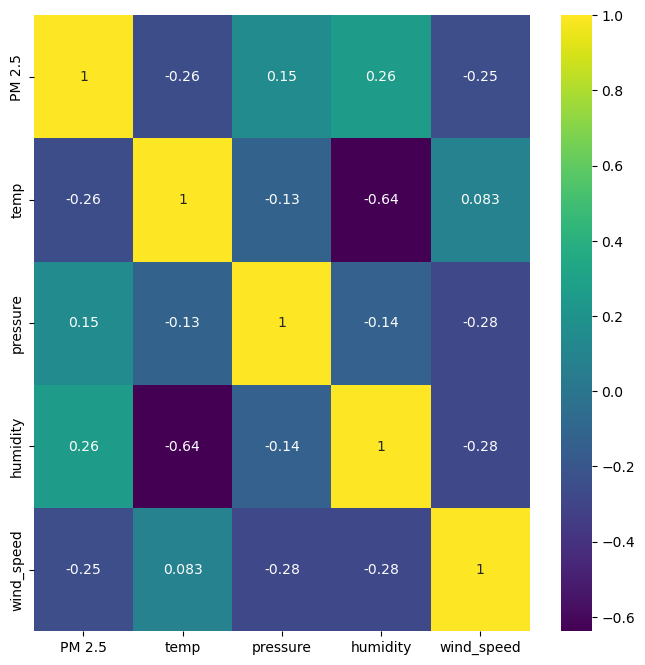

In [39]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True, cmap='viridis' )

Let's visualize the distribution of the temp variable. We can uncover which temperature values occur the most frequently. (Temperature values are standardized). 

/tmp/ipykernel_57/1031106641.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["temp"],color="g",rug=True, label="Temperature")


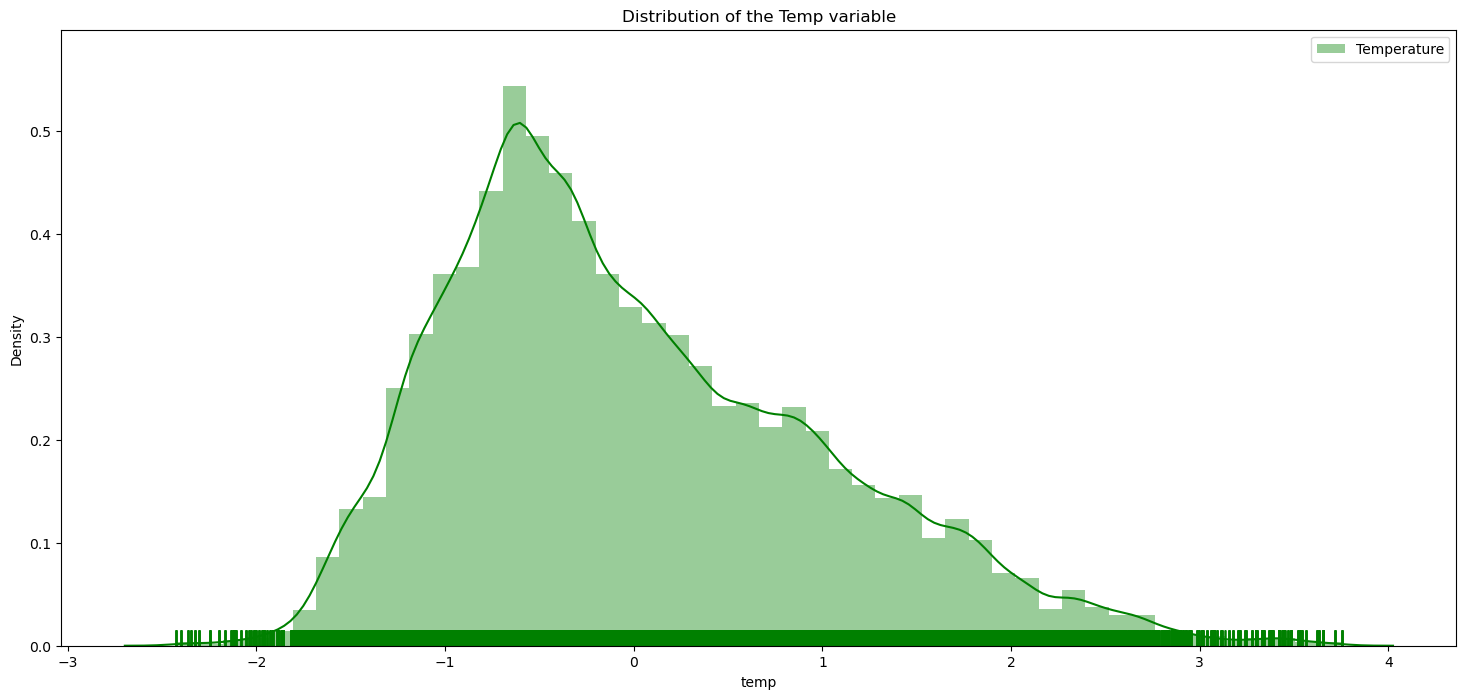

In [40]:
plt.figure(figsize=(18,8))
sns.distplot(data["temp"],color="g",rug=True, label="Temperature")
plt.legend()
plt.title("Distribution of the Temp variable")
plt.show()

In [11]:
def optimize_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
        print(means)
        print(inertias)

        
        
    plt.figure(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.title('Finding optimal K-Means clusters using Elbow method')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Sum of Squared Distance (WSSD)')
    plt.show()


Let's perform our optimized K search on two columns, temp and pressure. 

[1]
[324345.99999997247]
[1, 2]
[324345.99999997247, 199667.93618079356]
[1, 2, 3]
[324345.99999997247, 199667.93618079356, 112122.68470635117]
[1, 2, 3, 4]
[324345.99999997247, 199667.93618079356, 112122.68470635117, 88545.12419412729]
[1, 2, 3, 4, 5]
[324345.99999997247, 199667.93618079356, 112122.68470635117, 88545.12419412729, 73388.20688084673]
[1, 2, 3, 4, 5, 6]
[324345.99999997247, 199667.93618079356, 112122.68470635117, 88545.12419412729, 73388.20688084673, 62570.06926495991]
[1, 2, 3, 4, 5, 6, 7]
[324345.99999997247, 199667.93618079356, 112122.68470635117, 88545.12419412729, 73388.20688084673, 62570.06926495991, 52825.32411846385]
[1, 2, 3, 4, 5, 6, 7, 8]
[324345.99999997247, 199667.93618079356, 112122.68470635117, 88545.12419412729, 73388.20688084673, 62570.06926495991, 52825.32411846385, 46768.79519041268]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[324345.99999997247, 199667.93618079356, 112122.68470635117, 88545.12419412729, 73388.20688084673, 62570.06926495991, 52825.32411846385, 46768.

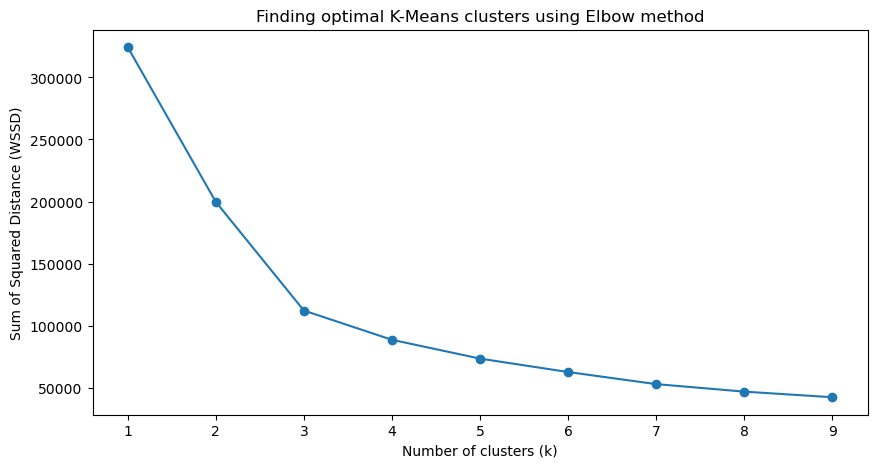

In [12]:
optimize_k_means(data[['temp' , 'pressure']],10)

From looking at our plot, it appears the "elbow" appears at k=3.

This means our data should separate into 3 distinct clusters (ideally). 

### Pre-Visualization of Variables

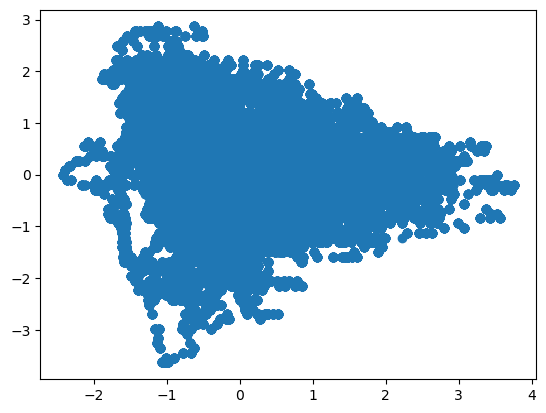

In [13]:
plt.scatter(data['temp'] , data['pressure'])

### Applying K-Means Clustering

Let's initialize the K-means algorithm starting with 3 clusters, the ideal value we found from our elbow plot.

In [14]:
kmeans= KMeans(n_clusters=3)

In [15]:
kmeans.fit(data[['temp' , 'pressure']]) # Creating a k-means algorithm for a 2-dimensional space only. Think of a coordinate grid. 

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [16]:
# Adds a new column, which represents its cluster assignments.
data['kmeans_3'] = kmeans.labels_
data

,PM 2.5,temp,pressure,humidity,wind_speed,kmeans_3
Time_stamp,,,,,,
2018-12-31 18:30:53,9.491787,-0.294721,1.566809,1.316638,-0.282055,1
2018-12-31 18:35:01,9.257285,-0.294721,1.566809,1.316638,-0.282055,1
2018-12-31 18:39:09,7.516109,-0.294721,1.566809,1.316638,-0.282055,1
2018-12-31 18:43:17,2.694167,-0.294721,1.566809,1.316638,-0.282055,1
2018-12-31 18:47:24,2.066142,-0.294721,1.566809,1.316638,-0.282055,1
...,...,...,...,...,...,...
2020-02-28 18:11:12,-0.452554,-0.513885,-0.197812,-0.976532,-0.055312,2
2020-02-28 18:14:31,-0.423241,-0.513885,-0.197812,-0.976532,-0.055312,2
2020-02-28 18:21:01,-0.452554,-0.513885,-0.197812,-0.976532,-0.055312,2


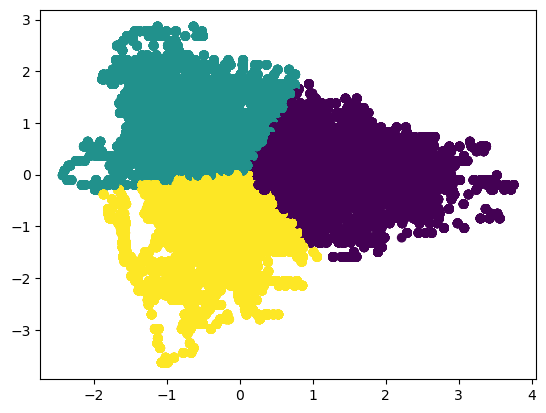

In [17]:
plt.scatter(x=data['temp'], y=data['pressure'], c=data['kmeans_3'])

### Creating Multiple Clusters

In [18]:
data.head()

,PM 2.5,temp,pressure,humidity,wind_speed,kmeans_3
Time_stamp,,,,,,
2018-12-31 18:30:53,9.491787,-0.294721,1.566809,1.316638,-0.282055,1
2018-12-31 18:35:01,9.257285,-0.294721,1.566809,1.316638,-0.282055,1
2018-12-31 18:39:09,7.516109,-0.294721,1.566809,1.316638,-0.282055,1
2018-12-31 18:43:17,2.694167,-0.294721,1.566809,1.316638,-0.282055,1
2018-12-31 18:47:24,2.066142,-0.294721,1.566809,1.316638,-0.282055,1


In [19]:
for k in range(1,6):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(data[['temp' , 'pressure']]) 
    data[f'KMeans_{k}'] = kmeans.labels_

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [20]:
data.head()

,PM 2.5,temp,pressure,humidity,wind_speed,kmeans_3,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5
Time_stamp,,,,,,,,,,,
2018-12-31 18:30:53,9.491787,-0.294721,1.566809,1.316638,-0.282055,1,0,0,0,1,2
2018-12-31 18:35:01,9.257285,-0.294721,1.566809,1.316638,-0.282055,1,0,0,0,1,2
2018-12-31 18:39:09,7.516109,-0.294721,1.566809,1.316638,-0.282055,1,0,0,0,1,2
2018-12-31 18:43:17,2.694167,-0.294721,1.566809,1.316638,-0.282055,1,0,0,0,1,2
2018-12-31 18:47:24,2.066142,-0.294721,1.566809,1.316638,-0.282055,1,0,0,0,1,2


You may notice that ```kmeans_3``` and ```KMeans_3``` are different, even though the code that was used to add them are the same. 

Remember, when we start the k-means algorithm, cluster numbers are randomly assigned. This is why the numbers may appear different.  

### Testing Different K Values on our Data:

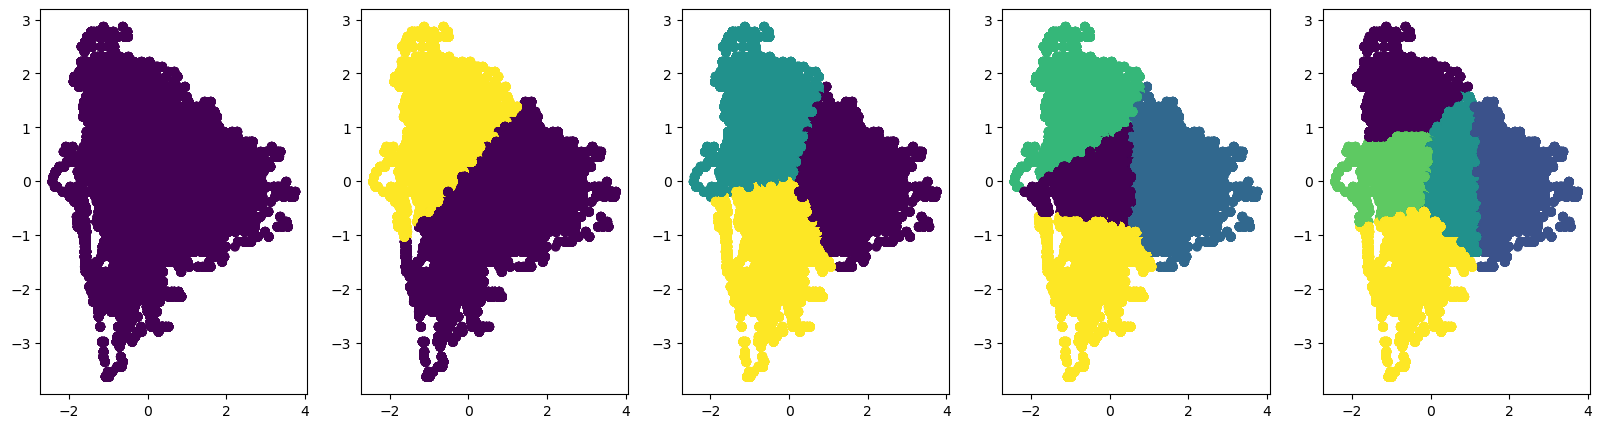

In [51]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=data['temp'], y=data['pressure'], c=data[f'KMeans_{i}'])

    

Before we begin our k-means clustering process, we need to prepare our data. 

This means that we must ensure our data is in a numpy or pandas dataframe, which we already have. 

We also need to ensure our data is in the correct format (numerical features only with no missing values).

In [21]:
data = data[['PM 2.5' , 'temp', 'pressure', 'humidity', 'wind_speed']]
data

,PM 2.5,temp,pressure,humidity,wind_speed
Time_stamp,,,,,
2018-12-31 18:30:53,9.491787,-0.294721,1.566809,1.316638,-0.282055
2018-12-31 18:35:01,9.257285,-0.294721,1.566809,1.316638,-0.282055
2018-12-31 18:39:09,7.516109,-0.294721,1.566809,1.316638,-0.282055
2018-12-31 18:43:17,2.694167,-0.294721,1.566809,1.316638,-0.282055
2018-12-31 18:47:24,2.066142,-0.294721,1.566809,1.316638,-0.282055
...,...,...,...,...,...
2020-02-28 18:11:12,-0.452554,-0.513885,-0.197812,-0.976532,-0.055312
2020-02-28 18:14:31,-0.423241,-0.513885,-0.197812,-0.976532,-0.055312
2020-02-28 18:21:01,-0.452554,-0.513885,-0.197812,-0.976532,-0.055312


In [22]:
# Create an instance of the KMeans class and specify the number of clusters (k):

k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k)


In [23]:
# Fit the data to the k-means model:

kmeans.fit(data) # The data variable here represents your input data, which should be in the form of a NumPy array or pandas DataFrame.


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [24]:
# Accessing the cluster assignments and cluster centers:

cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

- cluster_labels will contain the assigned cluster labels for each data point
- cluster_centers will store the coordinates of the cluster centers.

In [25]:
# Since we specified 3 clusters, there are 3 different cluster groupings our datapoint could fall into: 0, 1, or 2. 
np.unique(cluster_labels)

array([0, 1, 2], dtype=int32)

In [26]:
# Values of cluster centers for each of our 3 cluster groupings. Keep in mind we are operating in a 5-dimensional space. 
cluster_centers

array([[ 0.45833671, -0.61238871,  0.54323948,  0.61577835, -0.65744751],
       [-0.28866344,  1.21885171,  0.22367972, -1.2697872 , -0.01428241],
       [-0.31574323, -0.2103823 , -0.8036028 ,  0.24507977,  0.77796116]])

In [27]:
# Performing predictions on new data:

new_data = np.array([[7, -0.4, 1.2, 0.5, -0.15]])  # New data point. What variables do these values correspond do? How do we know if they are reasonable values?

# The predict() method allows user to obtain the predicted cluster labels for new, unseen points.
predicted_labels = kmeans.predict(new_data)

predicted_labels

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0], dtype=int32)

### Your Turn! 

First, try to get an idea of what values are reasonable by using a python function that could tell you summary statistics on the columns.

Then, using those values, make a prediction from it, and discover the which cluster this new datapoint would likely fall under. 

In [ ]:
data.describe()

,PM 2.5,temp,pressure,humidity,wind_speed
count,1.621730e+05,1.621730e+05,1.621730e+05,1.621730e+05,1.621730e+05
mean,2.523679e-17,6.168993e-17,-4.907154e-18,3.014395e-17,-6.168993e-17
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-7.090401e-01,-2.424841e+00,-3.634178e+00,-3.165467e+00,-1.518026e+00
25%,-5.009198e-01,-7.330491e-01,-6.621854e-01,-6.117096e-01,-7.222030e-01
50%,-2.862041e-01,-2.062866e-01,-1.206199e-02,2.742878e-01,-5.531232e-02
75%,2.172418e-01,6.447359e-01,6.380614e-01,8.996978e-01,6.115784e-01
max,6.071870e+01,3.751481e+00,2.867056e+00,1.316638e+00,6.120095e+00


In [29]:
mean_values = np.array([[0,0,0,0,0]]) 

predicted_labels = kmeans.predict(mean_values)

predicted_labels

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2], dtype=int32)